<a href="https://colab.research.google.com/github/MJY250422/AI_academy/blob/Practice/%EA%B4%91%EC%A3%BC%EA%B4%91%EC%97%AD%EC%8B%9C_%EB%8F%99%EA%B5%AC_%EC%9D%B8%EA%B5%AC%ED%98%84%ED%99%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs

!pip install koreanize-matplotlib
import koreanize_matplotlib

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/광주시동구인구통계.csv')
df.head()

,Unnamed: 0,구분,세대수,총인구수,남자,여자,통수,반수,65세이상,1인세대수,전월인구수,연령별_65세이상_합계
0,0,합 계,54922.0,105043.0,51462.0,53581.0,207.0,1171.0,25322.0,27529.0,105151.0,NaN
1,1,충장동,4423.0,5582.0,2706.0,2876.0,15.0,45.0,1118.0,3620.0,5567.0,1118.0
2,2,동명동,2389.0,3461.0,1782.0,1679.0,10.0,61.0,1034.0,1721.0,3454.0,1034.0
3,3,계림1동,5481.0,9943.0,5201.0,4742.0,21.0,120.0,2137.0,3006.0,9930.0,2137.0
4,4,계림2동,5637.0,13301.0,6418.0,6883.0,22.0,146.0,2386.0,1779.0,13295.0,2386.0


In [ ]:
df = df.drop(columns='Unnamed: 0')
df.head()

,구분,세대수,총인구수,남자,여자,통수,반수,65세이상,1인세대수,전월인구수,연령별_65세이상_합계
0,합 계,54922.0,105043.0,51462.0,53581.0,207.0,1171.0,25322.0,27529.0,105151.0,NaN
1,충장동,4423.0,5582.0,2706.0,2876.0,15.0,45.0,1118.0,3620.0,5567.0,1118.0
2,동명동,2389.0,3461.0,1782.0,1679.0,10.0,61.0,1034.0,1721.0,3454.0,1034.0
3,계림1동,5481.0,9943.0,5201.0,4742.0,21.0,120.0,2137.0,3006.0,9930.0,2137.0
4,계림2동,5637.0,13301.0,6418.0,6883.0,22.0,146.0,2386.0,1779.0,13295.0,2386.0


In [ ]:
df = df.iloc[1:14]
df.head(20)

,구분,세대수,총인구수,남자,여자,통수,반수,65세이상,1인세대수,전월인구수,연령별_65세이상_합계
1,충장동,4423.0,5582.0,2706.0,2876.0,15.0,45.0,1118.0,3620.0,5567.0,1118.0
2,동명동,2389.0,3461.0,1782.0,1679.0,10.0,61.0,1034.0,1721.0,3454.0,1034.0
3,계림1동,5481.0,9943.0,5201.0,4742.0,21.0,120.0,2137.0,3006.0,9930.0,2137.0
4,계림2동,5637.0,13301.0,6418.0,6883.0,22.0,146.0,2386.0,1779.0,13295.0,2386.0
5,산수1동,4239.0,7700.0,3827.0,3873.0,17.0,89.0,1979.0,2294.0,7734.0,1979.0
6,산수2동,4531.0,9413.0,4553.0,4860.0,17.0,110.0,2822.0,1833.0,9429.0,2822.0
7,지산1동,2414.0,3953.0,2024.0,1929.0,10.0,56.0,1011.0,1556.0,3969.0,1011.0
8,지산2동,2321.0,4100.0,2109.0,1991.0,9.0,51.0,1115.0,1332.0,4119.0,1115.0
9,서남동,2512.0,3158.0,1617.0,1541.0,10.0,51.0,683.0,2096.0,3167.0,683.0
10,학 동,3372.0,7029.0,3340.0,3689.0,20.0,92.0,1715.0,1392.0,7038.0,NaN


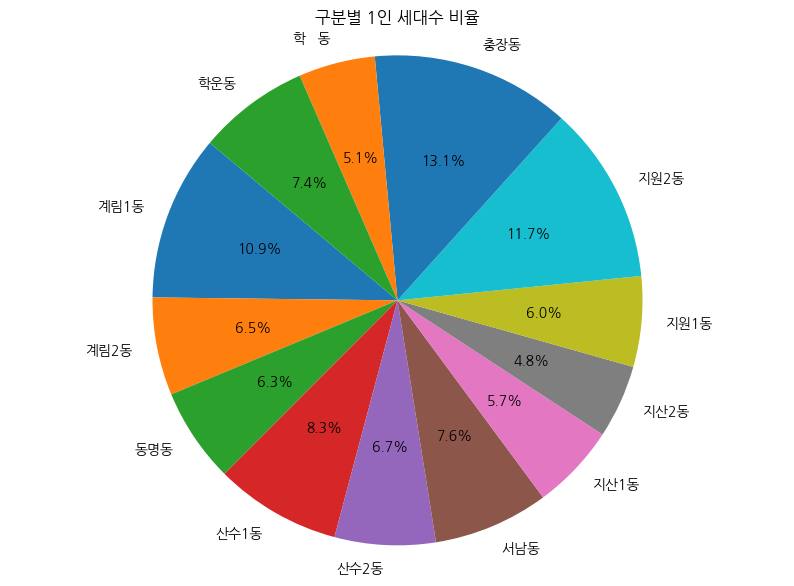

In [ ]:
# prompt: '구분' 컬럼을 기준으로 '1인 세대수' 컬럼의 비율 계산 및 파이차트 시각화

ratio_by_gubun = df.groupby('구분')['1인세대수'].sum()
total_one_person_household = ratio_by_gubun.sum()
ratio_by_gubun = ratio_by_gubun / total_one_person_household * 100

plt.figure(figsize=(10, 7))
plt.pie(ratio_by_gubun, labels=ratio_by_gubun.index, autopct='%1.1f%%', startangle=140)
plt.title('구분별 1인 세대수 비율')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

/tmp/ipython-input-68-1720543689.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['1인세대수_총인구수_비율'] = df['1인세대수'] / df['총인구수'] * 100
/tmp/ipython-input-68-1720543689.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbs.barplot(x='구분', y='1인세대수_총인구수_비율', data=df, palette='viridis')


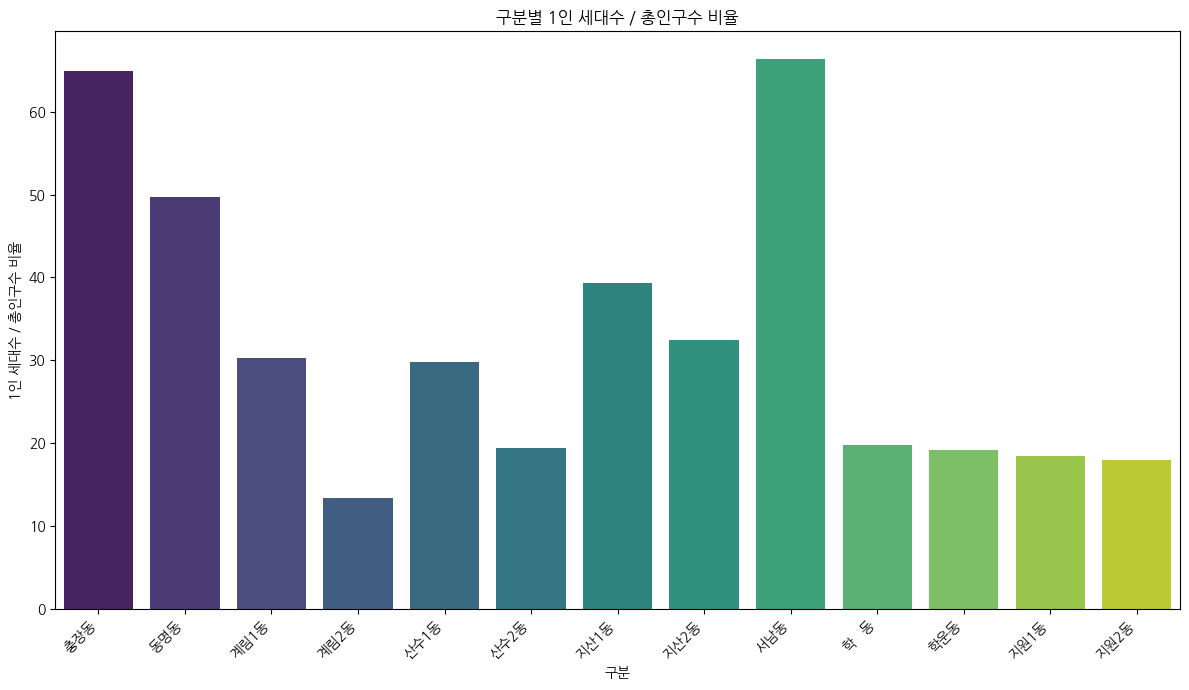

In [ ]:
# prompt: 각 칼럼 별 1인세대수 / 총인구수 비율을 시각화해줘

# 각 구분별 1인세대수 / 총인구수 비율 계산
df['1인세대수_총인구수_비율'] = df['1인세대수'] / df['총인구수'] * 100

# 막대 그래프 시각화
plt.figure(figsize=(12, 7))
sbs.barplot(x='구분', y='1인세대수_총인구수_비율', data=df, palette='viridis')
plt.title('구분별 1인 세대수 / 총인구수 비율')
plt.xlabel('구분')
plt.ylabel('1인 세대수 / 총인구수 비율')
plt.xticks(rotation=45, ha='right') # x축 레이블 회전
plt.tight_layout() # 그래프 레이아웃 조정
plt.show()